# Cities by GDP — Analytics Notebook

This notebook demonstrates basic data analytics skills:
1. Read a CSV with pandas
2. Clean numeric columns
3. Build relevant Matplotlib charts

**Dataset:** `cities_by_gdp.csv`

In [1]:

# Basic imports
import pandas as pd
import matplotlib.pyplot as plt

# Display wide tables if needed
pd.set_option('display.max_columns', 50)


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Read the dataset (expects the CSV to be in the same folder as this notebook)
csv_path = "cities_by_gdp.csv"
df = pd.read_csv(csv_path)
print(df.shape)
df.head()

(903, 5)


,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population
0,1,A Coruña metropolitan area,Spain,28.819,"1,121,815"
1,2,Aachen,Germany,24.296,"249,070"
2,3,Aalborg,Denmark,31.855,"219,487"
3,4,Aarhus,Denmark,54.927,"352,751"
4,5,"Abbotsford, British Columbia",Canada,6.239,"203,907"


In [3]:

# The GDP and Population columns are strings; convert to numeric by removing non-numeric characters.
# Normalize column names
df.columns = [c.strip() for c in df.columns]

# Rename for easier typing
col_city = 'Metropolitian Area/City'
col_country = 'Country/Region'
col_gdp = 'Official est. GDP(billion US$)'
col_pop = 'Metropolitian Population'

# Remove non-digit characters (like commas) before converting to numeric
df['gdp_bil_usd'] = pd.to_numeric(df[col_gdp].astype(str).str.replace(r'[^0-9\.]+', '', regex=True), errors='coerce')
df['population'] = pd.to_numeric(df[col_pop].astype(str).str.replace(r'[^0-9\.]+', '', regex=True), errors='coerce')

# Drop rows where I couldn't parse GDP 
df_clean = df.dropna(subset=['gdp_bil_usd'])
df_clean.head()


,Index,Metropolitian Area/City,Country/Region,Official est. GDP(billion US$),Metropolitian Population,gdp_bil_usd,population
0,1,A Coruña metropolitan area,Spain,28.819,"1,121,815",28.819,1121815
1,2,Aachen,Germany,24.296,"249,070",24.296,249070
2,3,Aalborg,Denmark,31.855,"219,487",31.855,219487
3,4,Aarhus,Denmark,54.927,"352,751",54.927,352751
4,5,"Abbotsford, British Columbia",Canada,6.239,"203,907",6.239,203907


## Chart 1 — Top 15 Cities by GDP (billion $US)

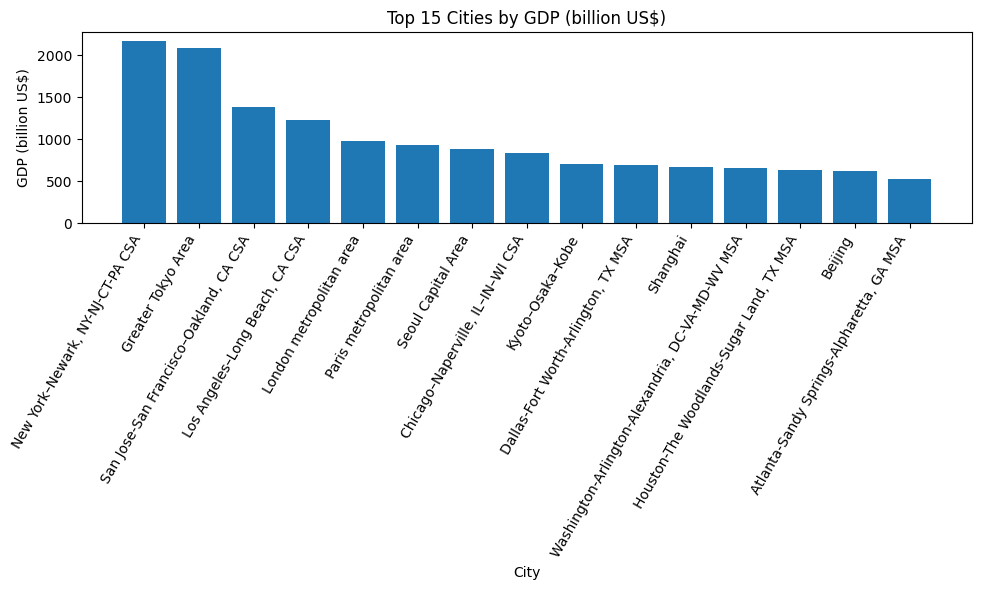

In [4]:

# Sort by GDP and take the top 15
top_cities = df_clean.sort_values('gdp_bil_usd', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.bar(top_cities[col_city], top_cities['gdp_bil_usd'])
plt.title('Top 15 Cities by GDP (billion US$)')
plt.xlabel('City')
plt.ylabel('GDP (billion US$)')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


## Chart 2 — Top 10 Countries by Total Metro GDP

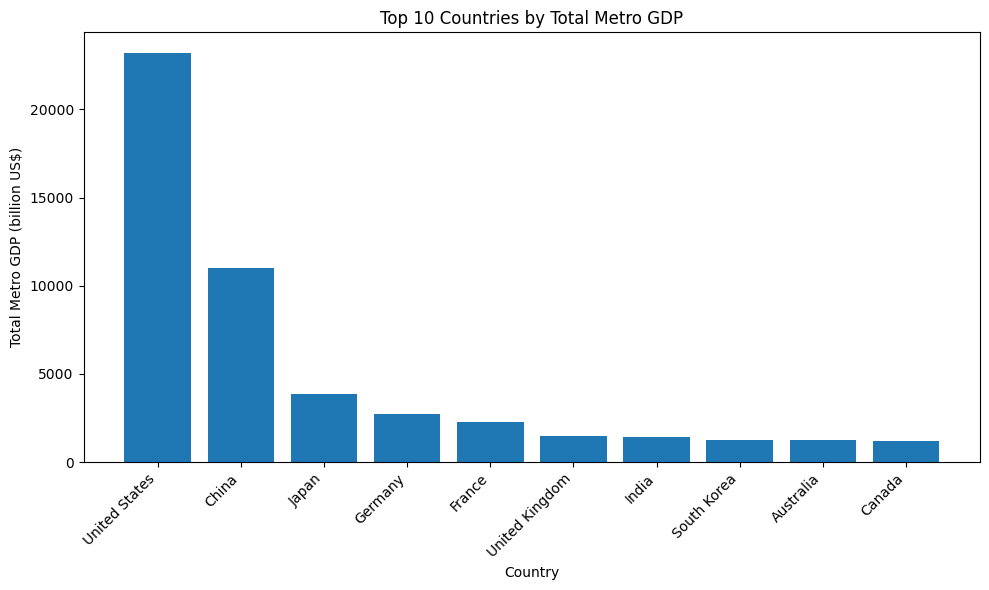

In [5]:

# Aggregate by country
country_gdp = df_clean.groupby(col_country, as_index=False)['gdp_bil_usd'].sum()
top_countries = country_gdp.sort_values('gdp_bil_usd', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_countries[col_country], top_countries['gdp_bil_usd'])
plt.title('Top 10 Countries by Total Metro GDP')
plt.xlabel('Country')
plt.ylabel('Total Metro GDP (billion US$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Chart 3 — City GDP vs Population (scatter)

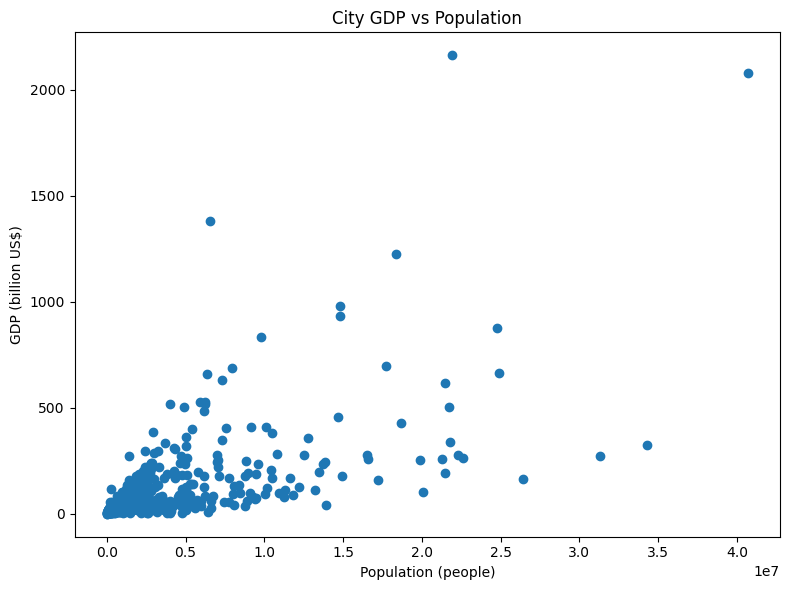

,Metropolitian Area/City,Country/Region,population,gdp_bil_usd
300,Greater Tokyo Area,Japan,40700000,2080.758
377,Jakarta metropolitan area,Indonesia,34307088,323.030
567,National Capital Region (Delhi),India,31300000,272.603
295,Greater Manila Area,Philippines,26400000,162.300
732,Shanghai,China,24890106,663.874
730,Seoul Capital Area,South Korea,24800000,878.535
298,Greater São Paulo,Brazil,22600000,261.642
548,Mumbai,India,22300000,277.980
572,"New York–Newark, NY-NJ-CT-PA CSA",United States,21914996,2163.208
296,Greater Mexico City,Mexico,21804515,340.800


In [6]:

# Scatter: GDP vs Population to show potential scale relationships.

scatter_df = df_clean.dropna(subset=['population'])

plt.figure(figsize=(8, 6))
plt.scatter(scatter_df['population'], scatter_df['gdp_bil_usd'])
plt.title('City GDP vs Population')
plt.xlabel('Population (people)')
plt.ylabel('GDP (billion US$)')
plt.tight_layout()
plt.show()

#show the top 10 most populous cities as a table
scatter_df[['Metropolitian Area/City', 'Country/Region', 'population', 'gdp_bil_usd']].sort_values('population', ascending=False).head(10)
